In [28]:
import kagglehub
import os
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, classification_report

path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Path to dataset files:", path)

trainpath = '/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_train/seg_train'
testpath = '/root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2/seg_test/seg_test'

Path to dataset files: /root/.cache/kagglehub/datasets/puneet6060/intel-image-classification/versions/2


In [29]:
'''
def open_image():
  classes = os.listdir(testpath)
  for i, ctgry in enumerate(classes):
    print(i, ctgry)
    img_path = os.path.join(testpath, ctgry, os.listdir(os.path.join(testpath, ctgry))[0])
    img = plt.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(ctgry)
    plt.axis('off')
  plt.tight_layout()
open_image()
'''

"\ndef open_image():\n  classes = os.listdir(testpath)\n  for i, ctgry in enumerate(classes):\n    print(i, ctgry)\n    img_path = os.path.join(testpath, ctgry, os.listdir(os.path.join(testpath, ctgry))[0])\n    img = plt.imread(img_path)\n    plt.subplot(2, 3, i+1)\n    plt.imshow(img)\n    plt.title(ctgry)\n    plt.axis('off')\n  plt.tight_layout()\nopen_image()\n"

In [30]:

dataset_train = tf.keras.utils.image_dataset_from_directory(trainpath, 'inferred', image_size = (150,150), batch_size=32)
val_ds = tf.keras.utils.image_dataset_from_directory(testpath, 'inferred', image_size = (150,150), batch_size=32)

class_names = dataset_train.class_names


'''
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
   '''
class_names


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [31]:
from tensorflow.keras.layers import Dense, Rescaling, Input, Flatten, Dropout, Conv2D, MaxPool2D

AUTOTUNE = tf.data.AUTOTUNE

dataset_train = dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = 6

model = tf.keras.Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1), strides=(1,1)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(1,1), strides=(1,1)),
    Flatten(),
    Dropout(0.6),
    Dense(num_classes, activation='softmax')
    ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.summary()
history = model.fit(dataset_train, validation_data=val_ds, epochs=3)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 75, 75, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 720000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 720000)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │       4,320,006 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,413,254 (16.84 MB)

 Trainable params: 4,413,254 (16.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.5859 - loss: 1.2554 - val_accuracy: 0.7523 - val_loss: 0.6987
Epoch 2/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.7808 - loss: 0.6222 - val_accuracy: 0.7463 - val_loss: 0.7395
Epoch 3/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.8382 - loss: 0.4656 - val_accuracy: 0.7727 - val_loss: 0.7393


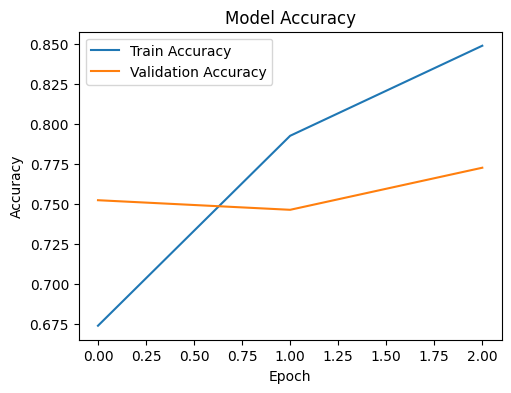

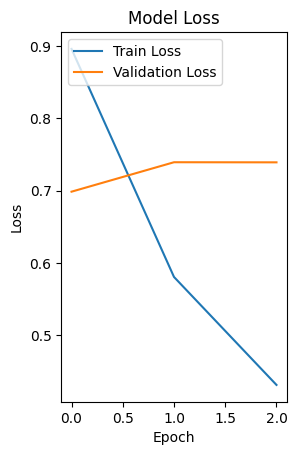

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper left')

plt.show()
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
[1 3 2 2 4 3 2 5 3 1]
[5 2 2 2 4 2 2 5 3 1]


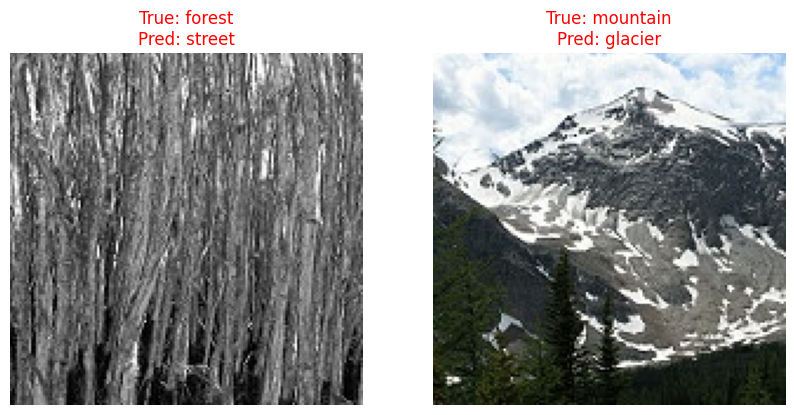

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7812 - loss: 0.7172
Test Accuracy: 0.78125


In [52]:
y_pred = model.predict(val_ds)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

print(y_true[:10])
y_pred_classes = np.argmax(y_pred, 1)
print(y_pred_classes[:10])

images, true_labels = next(iter(val_ds))
true_labels = np.array(true_labels)
num_images_to_show = 2
plt.figure(figsize=(10, 10))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    true_label = true_labels[i]
    y_pred_label = y_pred_classes[i]
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[y_pred_label]}", color=("green" if true_label == y_pred_label else "red"))
    plt.axis("off")

plt.show()

test_loss, test_accuracy = model.evaluate(images, true_labels)

tl1 = test_loss
ta1 = test_accuracy
print(f"Test Accuracy: {test_accuracy}")


In [36]:
model2 = tf.keras.Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), strides=(2,2), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), strides=(2,2), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
    ])

In [37]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model2.summary()
model2.fit(dataset_train, validation_data=val_ds, epochs=3)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 75, 75, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 19, 19, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 9, 9, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,151,558 (4.39 MB)

 Trainable params: 1,151,558 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.4567 - loss: 1.3022 - val_accuracy: 0.7313 - val_loss: 0.7172
Epoch 2/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.7267 - loss: 0.7474 - val_accuracy: 0.7857 - val_loss: 0.5825
Epoch 3/3
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.7904 - loss: 0.5819 - val_accuracy: 0.8153 - val_loss: 0.5272


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
[1 3 2 2 4 3 2 5 3 1]
[1 3 2 2 4 4 2 5 2 5]


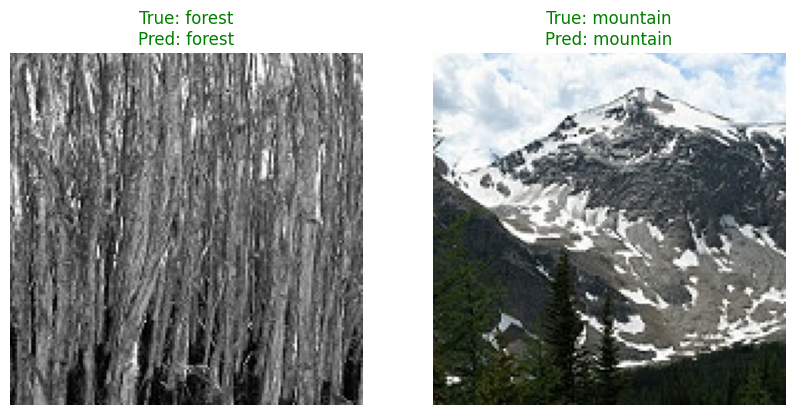

In [39]:
y_pred = model2.predict(val_ds)
y_true = np.concatenate([y for x, y in val_ds], axis=0)

print(y_true[:10])
y_pred_classes = np.argmax(y_pred, 1)
print(y_pred_classes[:10])

images, true_labels = next(iter(val_ds))
true_labels = np.array(true_labels)
num_images_to_show = 2
plt.figure(figsize=(10, 10))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    true_label = true_labels[i]
    y_pred_label = y_pred_classes[i]
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[y_pred_label]}", color=("green" if true_label == y_pred_label else "red"))
    plt.axis("off")

plt.show()

In [57]:
from sklearn.metrics import confusion_matrix

test_loss, test_accuracy = model2.evaluate(images, true_labels)
tl2 = test_loss
ta2 = test_accuracy
print(f"Test Accuracy: {test_accuracy}\n\n")

cm = confusion_matrix(y_true, y_pred_classes)
cm = cm.diagonal()/cm.sum(axis=1)

per_class = {}
for i in range(len(cm)):
  per_class[class_names[i]] = cm[i]

pc_acc = pd.DataFrame(per_class, index=['Accuracy'])
pc_acc = pc_acc.style.set_caption('Per-Class Accuracy')
display(pc_acc)

model_nums = {
    'Metric': ['Accuracy', 'Loss'],
    'Model 1': [ta1,tl1],
'Model 2': [ta2,tl2]
}

acc_loss = pd.DataFrame(model_nums, index=['', ''])
acc_loss = acc_loss.style.set_caption('Test Loss and Accuracy Between Both Models')
display(acc_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8125 - loss: 0.4917
Test Accuracy: 0.8125




,buildings,forest,glacier,mountain,sea,street
Accuracy,0.723112,0.814346,0.746835,0.748571,0.760784,0.842315


,Metric,Model 1,Model 2
,Accuracy,0.781250,0.812500
,Loss,0.717193,0.491711


There were two CNN models used to test the image classification, one with 3 convolutional layers, and the other with 6. They both also had 3 max_pooling layers, a dropout and dense layer. Both were relatively successful, with test accuracies of .781 and .812, and per class accuracies all ranging between .72 and .84. The second model had a lower loss with .49 compared to model 1's .717. Overall, the second model was slightly more successful in classifying the natural images. Different values of dropout rate were used, but .5 was found to be the most ideal.